# 2020 Post Season Projections

In [1]:
import pandas as pd

d = pd.read_csv('~/Downloads/mlb_elo_latest.csv')
d['date'] = pd.to_datetime(d.date)
d.shape

(2429, 26)

In [2]:
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2021-10-03,2021,0,NaN,ATL,NYM,1550.101226,1497.132951,0.608989,0.391011,...,NaN,NaN,NaN,NaN,0.579430,0.420570,NaN,NaN,NaN,NaN
1,2021-10-03,2021,0,NaN,STL,CHC,1499.948915,1461.073445,0.589510,0.410490,...,NaN,NaN,NaN,NaN,0.571600,0.428400,NaN,NaN,NaN,NaN
2,2021-10-03,2021,0,NaN,SEA,ANA,1502.246832,1484.129353,0.560317,0.439683,...,NaN,NaN,NaN,NaN,0.538385,0.461615,NaN,NaN,NaN,NaN
3,2021-10-03,2021,0,NaN,LAD,MIL,1595.764082,1554.621828,0.592664,0.407336,...,NaN,NaN,NaN,NaN,0.604536,0.395464,NaN,NaN,NaN,NaN
4,2021-10-03,2021,0,NaN,KCR,MIN,1465.955503,1477.341506,0.518145,0.481855,...,NaN,NaN,NaN,NaN,0.507388,0.492612,NaN,NaN,NaN,NaN


In [3]:
d = d[d.date.le(pd.Timestamp.today())]

<AxesSubplot:>

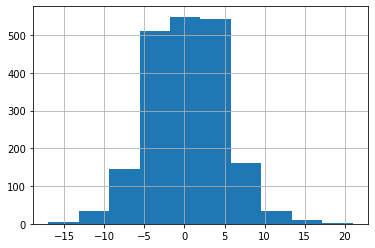

In [4]:
# predicting score differential could be interesting
(d.score1 - d.score2).hist()

In [5]:
d.date.min(), d.date.max()

(Timestamp('2021-04-01 00:00:00'), Timestamp('2021-09-03 00:00:00'))

In [6]:
# d = d[d.date.le('2020-09-27')]
# d.shape

In [7]:
import numpy as np
rename_teams = {
    'ANA': 'LAA',
    'CHW': 'CWS',
    'FLA': 'MIA',
    'KCR': 'KC',
    'SDP': 'SD',
    'SFG': 'SF',
    'TBD': 'TB',
    'WSN': 'WSH'
}
d['team1'] = np.where(d.team1.isin(rename_teams), d.team1.map(rename_teams), d.team1)
d['team2'] = np.where(d.team2.isin(rename_teams), d.team2.map(rename_teams), d.team2)

In [8]:
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
410,2021-09-03,2021,0,NaN,SD,HOU,1510.035195,1556.455862,0.467779,0.532221,...,40.248759,55.458068,-47.286754,7.591319,0.416753,0.583247,NaN,NaN,NaN,NaN
411,2021-09-03,2021,0,NaN,SF,LAD,1555.406632,1595.764082,0.476477,0.523523,...,52.710618,51.260710,4.407713,-20.617896,0.479801,0.520199,NaN,NaN,NaN,NaN
412,2021-09-03,2021,0,NaN,ARI,SEA,1445.130903,1502.246832,0.452486,0.547514,...,51.407910,51.346392,11.022941,12.132347,0.477502,0.522498,NaN,NaN,NaN,NaN
413,2021-09-03,2021,0,NaN,LAA,TEX,1484.129353,1439.086668,0.598073,0.401927,...,55.535018,50.170226,28.171714,3.190540,0.649929,0.350071,NaN,NaN,NaN,NaN
414,2021-09-03,2021,0,NaN,COL,ATL,1492.814158,1550.101226,0.452242,0.547758,...,54.265401,52.507378,6.494519,-5.060662,0.443269,0.556731,NaN,NaN,NaN,NaN


In [9]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().fit(d[['team1', 'team2']].melt()[['value']])
d['home_team_id'] = encoder.transform(d[['team1']]).astype(int)
d['away_team_id'] = encoder.transform(d[['team2']]).astype(int)
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,home_team_id,away_team_id
410,2021-09-03,2021,0,NaN,SD,HOU,1510.035195,1556.455862,0.467779,0.532221,...,-47.286754,7.591319,0.416753,0.583247,NaN,NaN,NaN,NaN,22,10
411,2021-09-03,2021,0,NaN,SF,LAD,1555.406632,1595.764082,0.476477,0.523523,...,4.407713,-20.617896,0.479801,0.520199,NaN,NaN,NaN,NaN,24,13
412,2021-09-03,2021,0,NaN,ARI,SEA,1445.130903,1502.246832,0.452486,0.547514,...,11.022941,12.132347,0.477502,0.522498,NaN,NaN,NaN,NaN,0,23
413,2021-09-03,2021,0,NaN,LAA,TEX,1484.129353,1439.086668,0.598073,0.401927,...,28.171714,3.190540,0.649929,0.350071,NaN,NaN,NaN,NaN,12,27
414,2021-09-03,2021,0,NaN,COL,ATL,1492.814158,1550.101226,0.452242,0.547758,...,6.494519,-5.060662,0.443269,0.556731,NaN,NaN,NaN,NaN,7,1


In [10]:
d['home_team_win'] = d.score1.gt(d.score2).astype(int)
d['away_team_win'] = 1 - d.home_team_win
assert (d.home_team_win + d.away_team_win == 1).all()
d = d.groupby(['date', 'home_team_id', 'away_team_id', 'team1', 'team2'])[['home_team_win', 'away_team_win']].sum().reset_index()
d.head()

,date,home_team_id,away_team_id,team1,team2,home_team_win,away_team_win
0,2021-04-01,4,21,CHC,PIT,0,1
1,2021-04-01,5,25,CIN,STL,0,1
2,2021-04-01,7,13,COL,LAD,1,0
3,2021-04-01,9,6,DET,CLE,1,0
4,2021-04-01,11,27,KC,TEX,1,0


In [11]:
d.shape

(1969, 7)

In [12]:
d['t'] = d.date.map({k: i for i, k in enumerate(d.date.unique())})
d

,date,home_team_id,away_team_id,team1,team2,home_team_win,away_team_win,t
0,2021-04-01,4,21,CHC,PIT,0,1,0
1,2021-04-01,5,25,CIN,STL,0,1,0
2,2021-04-01,7,13,COL,LAD,1,0,0
3,2021-04-01,9,6,DET,CLE,1,0,0
4,2021-04-01,11,27,KC,TEX,1,0,0
...,...,...,...,...,...,...,...,...
1964,2021-09-03,22,10,SD,HOU,0,1,151
1965,2021-09-03,24,13,SF,LAD,0,1,151
1966,2021-09-03,26,16,TB,MIN,0,1,151
1967,2021-09-03,28,19,TOR,OAK,0,1,151


In [13]:
# account for double headers
d['total_games'] = d.home_team_win + d.away_team_win
d = d[d.total_games.eq(1)]

In [82]:
import numpy as np
import pymc3 as pm
import theano
import theano.tensor as tt

n_teams = len(d.home_team_id.unique())
n_dates = d.t.max()
n_games = len(d)
n_matchups = np.array([d.total_games, d.total_games]).T
home_team_id = d.home_team_id.values
away_team_id = d.away_team_id.values
t = d.t.values
observed_wins = d[['home_team_win', 'away_team_win']]


def softmax(a):
    # reshaping for broadcasting
    a = T.exp(a)
    sum_ = T.sum(a, axis=1).reshape((1, -1)).T
    return a / sum_


with pm.Model() as model:
    σ_β = pm.HalfNormal('σ_β', np.log(5))
    β_0 = pm.Normal('β_0', 0, σ_β, shape=n_teams)

    b_sd = pm.HalfNormal('b_sd', 1e-2)
    b = pm.HalfNormal('b', b_sd, shape=n_teams)
    β_t = tt.cumsum(
        pm.Laplace('β_t', 0, b[None, np.arange(n_teams)], shape=(n_dates + 1, n_teams)),
        axis=0
    )
    
    a_t = pm.Deterministic('a_t', β_0 + β_t)

    a_1, a_2 = a_t[t, home_team_id], a_t[t, away_team_id]
    a = T.stack([a_1, a_2]).T

    p = pm.Deterministic('p', softmax(a))
                                                                                                                                                wins = pm.Bernoulli('wins', p=p, shape=(n_games, 2), observed=observed_wins)

    trace = pm.sample()

/Users/dantegates/virtualenvs/default1/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β_t, b, b_sd, β_0, σ_β]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1490 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


/Users/dantegates/virtualenvs/default1/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/Users/dantegates/virtualenvs/default1/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'σ_β'}>,
        <AxesSubplot:title={'center':'σ_β'}>],
       [<AxesSubplot:title={'center':'β_0'}>,
        <AxesSubplot:title={'center':'β_0'}>],
       [<AxesSubplot:title={'center':'b_sd'}>,
        <AxesSubplot:title={'center':'b_sd'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>]], dtype=object)

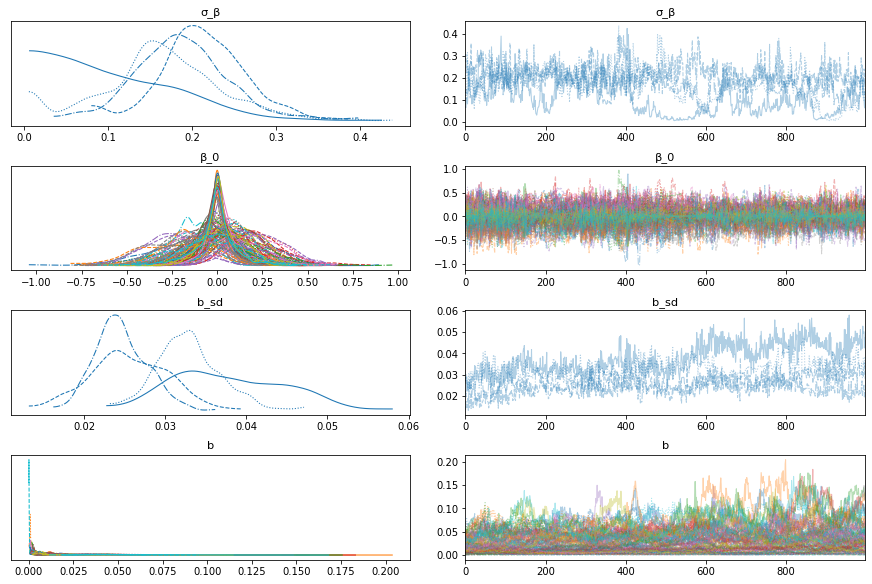

In [84]:
pm.traceplot(trace, var_names=['σ_β', 'β_0', 'b_sd', 'b'])

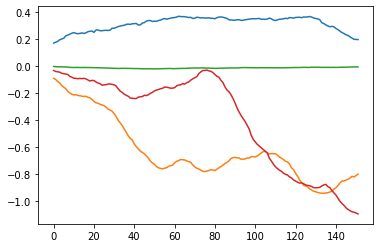

In [85]:
import matplotlib.pyplot as plt

team_id_lookup = {t: i for i, t in enumerate(encoder.categories_[0])}
_ = plt.plot(trace['a_t'][:, :, team_id_lookup['SF']].mean(axis=0))
_ = plt.plot(trace['a_t'][:, :, team_id_lookup['BAL']].mean(axis=0))
_ = plt.plot(trace['a_t'][:, :, team_id_lookup['PHI']].mean(axis=0))
_ = plt.plot(trace['a_t'][:, :, team_id_lookup['WSH']].mean(axis=0))

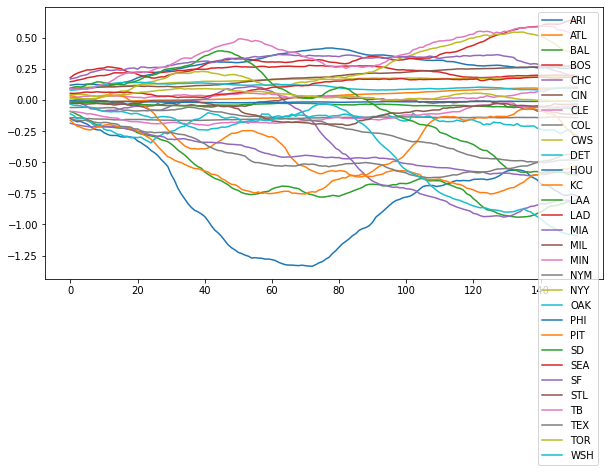

In [86]:
fig, ax = plt.subplots(figsize=(10, 5))

for team, ix in team_id_lookup.items():
    plt.plot(trace['a_t'][:, :, ix].mean(axis=0).T, label=team)

ax.legend()

(array([1.40000e+01, 1.69000e+02, 1.06500e+03, 2.14850e+04, 5.71266e+05,
        1.29060e+04, 8.75000e+02, 1.84000e+02, 2.50000e+01, 1.10000e+01]),
 array([-0.94058798, -0.72665336, -0.51271875, -0.29878413, -0.08484951,
         0.1290851 ,  0.34301972,  0.55695434,  0.77088895,  0.98482357,
         1.19875818]),
 <BarContainer object of 10 artists>)

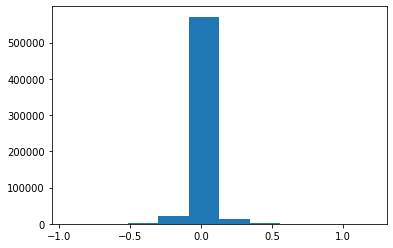

In [87]:
plt.hist(trace['β_t'][:, :, team_id_lookup['LAD']].ravel())

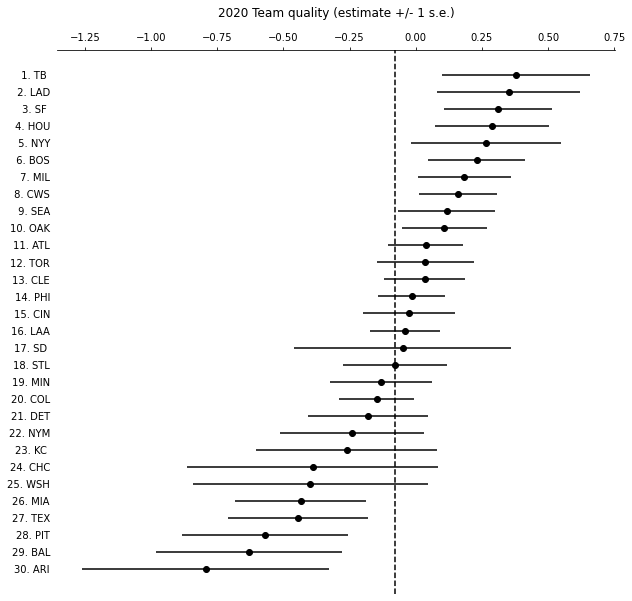

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

estimated_abilities = trace['a_t'][-5000:].mean(axis=(0, 1))
estimated_abilities_error = trace['a_t'][-5000:].std(axis=(0, 1))
team_id_lookup = {i: t for i, t in enumerate(encoder.categories_[0])}

center_line = np.mean(estimated_abilities)

values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])
values, labels, errors = zip(*tmp)
labels = [f'{n_teams-i:2}. {L:3}' for i, L in enumerate(labels)]

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(center_line, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('2020 Team quality (estimate +/- 1 s.e.)', y=1.05)

# plt.savefig('2020-postseason-projections/team-quality-estimates.png')

# Projections

## Constants and paramters

In [ ]:
# A lot of the values below will be hard-coded so I'll use these constants
# to make sure nothing gets dropped due to typos

WILD_CARD_CHAMPION = 'Wild Card Champion'
DIVISION_CHAMPION = 'Division Champion'
LEAGUE_CHAMPION = 'League Champion'
WORLD_SERIES_CHAMPION = 'World Series Champion'

LAD = 'LAD'
TB = 'TB'
SD = 'SD'
MIN = 'MIN'
CWS = 'CWS'
ATL = 'ATL'
CLE = 'CLE'
OAK = 'OAK'
CHC = 'CHC'
NYY = 'NYY'
TOR = 'TOR'
MIA = 'MIA'
STL = 'STL'
CIN = 'CIN'
MIL = 'MIL'
HOU = 'HOU'
SEA = 'SEA'
SF = 'SF'
PIT = 'PIT'
TEX = 'TEX'
ARI = 'ARI'
PHI = 'PHI'
NYM = 'NYM'
LAA = 'LAA'
KC = 'KC'
DET = 'DET'
COL = 'COL'
BOS = 'BOS'
BAL = 'BAL'
WSH = 'WSH'



# we'll need this for evaluations
series_id_to_prediction_column = {
    'wild_card_id': WILD_CARD_CHAMPION,
    'division_id': DIVISION_CHAMPION,
    'championship_id': LEAGUE_CHAMPION,
    'world_series_id': WORLD_SERIES_CHAMPION
}

In [ ]:


series_ids = pd.DataFrame([
    # American League
    [TB, 1, 1, 1, 1],
    [TOR, 1, 1, 1, 1],
    [CLE, 2, 1, 1, 1],
    [NYY, 2, 1, 1, 1],
    [MIN, 3, 2, 1, 1],
    [HOU, 3, 2, 1, 1],
    [OAK, 4, 2, 1, 1],
    [CWS, 4, 2, 1, 1],
    # National League
    [LAD, 5, 3, 2, 1],
    [MIL, 5, 3, 2, 1],
    [SD,  6, 3, 2, 1],
    [STL, 6, 3, 2, 1],
    [CHC, 7, 4, 2, 1],
    [MIA, 7, 4, 2, 1],
    [ATL, 8, 4, 2, 1],
    [CIN, 8, 4, 2, 1],
], columns=['Team', 'wild_card_id', 'division_id', 'championship_id', 'world_series_id'])

In [ ]:
import json
with open('divisions.json') as f:
    divisions = json.load(f)
divisions = {team: division for division, teams in divisions.items() for team in teams}
divisions

In [ ]:
results = pd.DataFrame({
    'Team': d.team1.drop_duplicates().sort_values(),
    'Division': d.team1.drop_duplicates().sort_values().map(divisions),
    WILD_CARD_CHAMPION: 0,
    DIVISION_CHAMPION: 0,
    LEAGUE_CHAMPION: 0,
    WORLD_SERIES_CHAMPION: 0
})

In [ ]:
import numpy as np
from tqdm.notebook import trange


def np_softmax(a):
    a = np.exp(a)
    return a / a.sum()


class Simulation:
    def __init__(self, a_post, encoder):
        self.a_post = a_post
        self.encoder = encoder
        self._sample = None
        
    def __enter__(self):
        self._sample = self.a_post[np.random.choice(len(self.a_post))]
        return self
    
    def __exit__(self, *exc):
        self._sample = None
        return False
    
    def simulate_series(self, team1, team2, best_of):
        id1, id2 = self._team_id(team1), self._team_id(team2)
        a = self._sample[[id1, id2]]
        p = np_softmax(a)
        wins1 = np.random.binomial(best_of, p[0])
        return team1 if wins1 > best_of // 2 else team2
    
    def _team_id(self, team):
        return self.encoder.transform([[team]])[0, 0].astype(int)



n_sim = 10_000

def make_update_results(category):
    def wrapper(df, team):
        df.loc[df.Team.eq(team), category] += 1

#         if category == DIVISION_CHAMPION:
#             df.loc[df.Team.eq(team), WILD_CARD_CHAMPION] -= 1
#         elif category == LEAGUE_CHAMPION:
#             df.loc[df.Team.eq(team), DIVISION_CHAMPION] -= 1
#         elif category == WORLD_SERIES_CHAMPION:
#             df.loc[df.Team.eq(team), LEAGUE_CHAMPION] -= 1

    return wrapper

update_wildcard_champion = make_update_results(WILD_CARD_CHAMPION)
update_division_champion = make_update_results(DIVISION_CHAMPION)
update_league_champion = make_update_results(LEAGUE_CHAMPION)
update_world_series_champion = make_update_results(WORLD_SERIES_CHAMPION)

for _ in trange(n_sim):
    with Simulation(trace['a_t'], encoder) as sim:

        # ALDS 1
        alwc1 = sim.simulate_series(TB, TOR, 3)
        alwc2 = sim.simulate_series(CLE, NYY, 3)
        update_wildcard_champion(results, alwc1)
        update_wildcard_champion(results, alwc2)

        alds1 = sim.simulate_series(alwc1, alwc2, 5)
        update_division_champion(results, alds1)

        # AL WC2
        alwc3 = sim.simulate_series(MIN, HOU, 3)
        alwc4 = sim.simulate_series(OAK, CWS, 3)
        update_wildcard_champion(results, alwc3)
        update_wildcard_champion(results, alwc4)

        alds2 = sim.simulate_series(alwc3, alwc4, 5)
        update_division_champion(results, alds2)

        # ALCS
        alcs = sim.simulate_series(alds1, alds2, 7)
        update_league_champion(results, alcs)

        # NLDS 1
        nlwc1 = sim.simulate_series(LAD, MIL, 3)
        nlwc2 = sim.simulate_series(SD, STL, 3)
        update_wildcard_champion(results, nlwc1)
        
        update_wildcard_champion(results, nlwc2)
        nlds1 = sim.simulate_series(nlwc1, nlwc2, 5)
        update_division_champion(results, nlds1)

        # NLDS 2
        nlwc3 = sim.simulate_series(CHC, MIA, 3)
        nlwc4 = sim.simulate_series(ATL, CIN, 3)
        update_wildcard_champion(results, nlwc3)
        update_wildcard_champion(results, nlwc4)
        
        nlds2 = sim.simulate_series(nlwc3, nlwc4, 5)
        update_division_champion(results, nlds2)

        # NLCS
        nlcs = sim.simulate_series(nlds1, nlds2, 7)
        update_league_champion(results, nlcs)

        # WS
        ws = sim.simulate_series(alcs, nlcs, 7)
        update_world_series_champion(results, ws)

results.loc[:, [WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]] /= (n_sim / 100)

In [ ]:
results.sort_values(WORLD_SERIES_CHAMPION, ascending=False, inplace=True)
results.set_index(np.arange(len(results)) + 1, inplace=True)
results

In [ ]:
# double checking that all the probabilities add to 1 for each series.
for s in series_ids.drop('Team', axis=1).columns:
    assert np.allclose(results.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum(), 100)

In [ ]:
assert np.isclose(results[WORLD_SERIES_CHAMPION].sum(), 100.), results[WORLD_SERIES_CHAMPION].sum()

# Get predictions from mlb.com
https://www.mlb.com/news/2020-mlb-postseason-predictions

In [ ]:
mlb_predictions = pd.DataFrame({
    'Team': d.team1.drop_duplicates().sort_values(),
    'Division': d.team1.drop_duplicates().sort_values().map(divisions),
    WILD_CARD_CHAMPION: 0,
    DIVISION_CHAMPION: 0,
    LEAGUE_CHAMPION: 0,
    WORLD_SERIES_CHAMPION: 0
})

# per richard justice
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, STL)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, ATL)
update_wildcard_champion(mlb_predictions, CHC)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, ATL)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per jesse sanchez
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, CWS)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per jesse sanchez
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, MIA)

update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, TB)


# per mark feinsand
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, CHC)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, CIN)
update_division_champion(mlb_predictions, SD)

update_league_champion(mlb_predictions, SD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, TB)


# per sarah langs
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, CLE)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, CHC)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, TB)
update_league_champion(mlb_predictions, LAD)

update_world_series_champion(mlb_predictions, LAD)


# per anthony castrovince
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)


# per will leitch
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, CLE)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, STL)
update_wildcard_champion(mlb_predictions, CHC)
update_wildcard_champion(mlb_predictions, ATL)

update_division_champion(mlb_predictions, CLE)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, ATL)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, CLE)

update_world_series_champion(mlb_predictions, CLE)


# per mike petriello
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, CHC)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)


# per nathalie alonso
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, CHC)
update_wildcard_champion(mlb_predictions, ATL)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, OAK)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per andrew simon
update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, CLE)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, CIN)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, SD)

update_division_champion(mlb_predictions, TB)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, TB)

update_world_series_champion(mlb_predictions, LAD)


# per jon paul morosi
update_wildcard_champion(mlb_predictions, TOR)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, OAK)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, OAK)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)


# per david venn

update_wildcard_champion(mlb_predictions, TB)
update_wildcard_champion(mlb_predictions, NYY)
update_wildcard_champion(mlb_predictions, CWS)
update_wildcard_champion(mlb_predictions, MIN)
update_wildcard_champion(mlb_predictions, LAD)
update_wildcard_champion(mlb_predictions, SD)
update_wildcard_champion(mlb_predictions, MIA)
update_wildcard_champion(mlb_predictions, CIN)

update_division_champion(mlb_predictions, NYY)
update_division_champion(mlb_predictions, MIN)
update_division_champion(mlb_predictions, LAD)
update_division_champion(mlb_predictions, CIN)

update_league_champion(mlb_predictions, LAD)
update_league_champion(mlb_predictions, NYY)

update_world_series_champion(mlb_predictions, LAD)

mlb_predictions.loc[:, [WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]] /= (12 / 100)
mlb_predictions[[WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]] = mlb_predictions[[WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]].round()

In [ ]:
mlb_predictions

In [ ]:
# double checking that all the probabilities add to 1 for each series.
for s in series_ids.drop('Team', axis=1).columns:
    assert (np.abs(mlb_predictions.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum() - 100) <= 1).all()

# Get fivethirtyeight predictions
https://projects.fivethirtyeight.com/2020-mlb-predictions/

In [ ]:
fivethirtyeight_predictions = pd.read_html('https://web.archive.org/web/20200929183851/https://projects.fivethirtyeight.com/2020-mlb-predictions/')
fivethirtyeight_predictions = fivethirtyeight_predictions[2].droplevel(0, axis=1).iloc[:, [0, 1, 4, 5, 6, 7]]
fivethirtyeight_predictions.columns = [
    'Team',
    'Division',
    WILD_CARD_CHAMPION,
    DIVISION_CHAMPION,
    LEAGUE_CHAMPION,
    WORLD_SERIES_CHAMPION
]
fivethirtyeight_predictions.replace('—', '0%', inplace=True)
fivethirtyeight_predictions.replace('<1%', '0%', inplace=True)
for col in [WILD_CARD_CHAMPION, DIVISION_CHAMPION, LEAGUE_CHAMPION, WORLD_SERIES_CHAMPION]:
    fivethirtyeight_predictions[col] = fivethirtyeight_predictions[col].str[:-1].astype(float)
fivethirtyeight_predictions

In [ ]:
fivethirtyeight_rename = {
    'DodgersDodgers': LAD,
    'RaysRays': TB,
    'TwinsTwins': MIN,
    'YankeesYankees': NYY,
    'BravesBraves': ATL,
    'PadresPadres': SD,
    'AstrosAstros': HOU,
    'AthleticsAthletics': OAK,
    'CubsCubs': CHC,
    'IndiansIndians': CLE,
    'RedsReds': CIN,
    'White SoxWhite Sox': CWS,
    'CardinalsCardinals': STL,
    'BrewersBrewers': MIL,
    'Blue JaysBlue Jays': TOR,
    'MarlinsMarlins': MIA,
    'GiantsGiants': SF,
    'PhilliesPhillies': PHI,
    'MarinersMariners': SEA,
    'NationalsNationals': WSH,
    'MetsMets': NYM,
    'RockiesRockies': COL,
    'RoyalsRoyals': KC,
    'AngelsAngels': LAA,
    'OriolesOrioles': BAL,
    'DiamondbacksDbacks': ARI,
    'Red SoxRed Sox': BOS,
    'TigersTigers': DET,
    'RangersRangers': TEX,
    'PiratesPirates': PIT,
}
fivethirtyeight_predictions['Team'] = fivethirtyeight_predictions.Team.map(fivethirtyeight_rename)
fivethirtyeight_predictions['Division'] = fivethirtyeight_predictions.Division.str.strip()

In [ ]:
fivethirtyeight_predictions

In [ ]:
for s in series_ids.drop('Team', axis=1).columns:
    print(fivethirtyeight_predictions.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum())
    assert (np.abs(fivethirtyeight_predictions.merge(series_ids).groupby(s)[series_id_to_prediction_column[s]].sum() - 100) <= 1).all()

# Create final data frame with all predictions

In [ ]:
final = pd.concat([
    results.set_index(['Team', 'Division']),
    mlb_predictions.set_index(['Team', 'Division']),
    fivethirtyeight_predictions.set_index(['Team', 'Division'])
], axis=1, keys=['DG: Probability of Becomming', 'MLB: Probability of Becomming', 'fivethirtyeight: Probability of Becomming'])
final.sort_values([('DG: Probability of Becomming', WORLD_SERIES_CHAMPION)], ascending=False)

# Evaluations

In [ ]:
from functools import partial

LOST_WILD_CARD = 'Lost Wild Card Series'

outcomes = pd.DataFrame([
    [LAD, 'Dodgers win World Series', WORLD_SERIES_CHAMPION],
    [TB, 'Rays win ALCS,\n but lose World Series', LEAGUE_CHAMPION],
    [ATL, 'Braves win Division Series,\n but lose NLCS', DIVISION_CHAMPION],
    [HOU, 'Astros win Division Series,\n but lose ALCS', DIVISION_CHAMPION],
    [SD, 'Padres win Wild Card,\n lose Division Series', WILD_CARD_CHAMPION],
    [MIA, 'Marlins win Wild Card,\n but lose Division Series', WILD_CARD_CHAMPION],
    [NYY, 'Yankees win Wild Card,\n but lose Division Series', WILD_CARD_CHAMPION],
    [OAK, 'A\'s win Wild Card,\n but lose Division Series', WILD_CARD_CHAMPION],
    
#     [TOR, 'Blue Jays lose the Wild Card Series', LOST_WILD_CARD],
#     [CLE, 'Indians lose the Wild Card Series', LOST_WILD_CARD],
#     [MIN, 'Twins lose the Wild Card Series', LOST_WILD_CARD],
#     [CWS, 'White Sox lose the Wild Card Series', LOST_WILD_CARD],
#     [MIL, 'Brewers lose the Wild Card Series', LOST_WILD_CARD],
#     [STL, 'Cardinals lose the Wild Card Series', LOST_WILD_CARD],
#     [CHC, 'Cubs lose the Wild Card Series', LOST_WILD_CARD],
#     [CIN, 'Reds lose the Wild Card Series', LOST_WILD_CARD]
], columns=['team', 'description', 'title'])

In [ ]:
titles = [
    LOST_WILD_CARD,
    WILD_CARD_CHAMPION,
    DIVISION_CHAMPION,
    LEAGUE_CHAMPION,
    WORLD_SERIES_CHAMPION
]

title_index = {t: i for i, t in enumerate(titles)}

def calculate_likelihoods(predictions):
    L = pd.DataFrame({
        'team': predictions.Team,
    })
    L[WORLD_SERIES_CHAMPION] = predictions[WORLD_SERIES_CHAMPION]
    L[LEAGUE_CHAMPION] = predictions[LEAGUE_CHAMPION] - predictions[WORLD_SERIES_CHAMPION]
    L[DIVISION_CHAMPION] = predictions[DIVISION_CHAMPION] - predictions[LEAGUE_CHAMPION]
    L[WILD_CARD_CHAMPION] = predictions[WILD_CARD_CHAMPION] - predictions[DIVISION_CHAMPION]
    L[LOST_WILD_CARD] = 100 - predictions[WILD_CARD_CHAMPION]
    assert L.drop('team', axis=1).sum(axis=1).eq(100).all(), L
    L = L.melt(id_vars='team', value_vars=titles, var_name='title', value_name='likelihood')
    L['likelihood'] /= 100
    return L

dg_likelihoods = calculate_likelihoods(results)
five38_likelihoods = calculate_likelihoods(fivethirtyeight_predictions)
mlb_likelihoods = calculate_likelihoods(mlb_predictions)

In [ ]:
random_model = {
    LOST_WILD_CARD: (1 / 2),
    WILD_CARD_CHAMPION: (1 / 2),
    DIVISION_CHAMPION: (1 / (2 ** 2)),
    LEAGUE_CHAMPION: (1 / (2 ** 3)),
    WORLD_SERIES_CHAMPION: (1 / (2 ** 4))
}

random_likelihoods = outcomes.copy()
random_likelihoods['likelihood'] = random_likelihoods.title.map(random_model)
random_likelihoods

In [ ]:
outcomes['DG'] = outcomes.merge(dg_likelihoods).likelihood
outcomes['FiveThirtyEight'] = outcomes.merge(five38_likelihoods).likelihood
outcomes['mlb.com'] = outcomes.merge(mlb_likelihoods).likelihood
outcomes['Random Chance'] = outcomes.merge(random_likelihoods).likelihood

In [ ]:
outcomes

In [ ]:
# fig, axs = plt.subplots(1, 4, figsize=(10, 5), sharex=True,  sharey=True)


# axs[0].set(title='DG', xlabel='Likelihood', ylabel='Frequency', xlim=(0, 1))
# axs[1].set(title='FiveThirtyEight', xlabel='Likelihood')
# axs[2].set(title='mlb.com', xlabel='Likelihood')
# axs[3].set(title='random', xlabel='Likelihood')

# outcomes.dg_likelihood.hist(alpha=0.8, ax=axs[0])
# outcomes.five38_likelihood.hist(alpha=0.8, ax=axs[1])
# outcomes.mlb_likelihood.hist(alpha=0.8, ax=axs[2])
# outcomes.random_likelihood.hist(alpha=0.8, ax=axs[3])

# plt.gca().legend()

In [ ]:
import seaborn as sns

FORECASTS = ['DG', 'FiveThirtyEight', 'mlb.com', 'Random Chance']
Y_LABEL = 'description'
X_LABEL = 'Likelihood'
LEGEND = 'Forecast'

fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('Forecasted Likelihoods of Postseason Outcomes')

z = outcomes.melt(
    id_vars=Y_LABEL,
    value_vars=FORECASTS,
    value_name=X_LABEL,
    var_name=LEGEND)

sns.barplot(y=Y_LABEL, x=X_LABEL, hue=LEGEND, data=z)
ax.set(ylabel=None, xlim=(0, 1))

plt.tight_layout()
plt.savefig('2020-evaluations/forecasted-likelihoods.png')

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(13, 11))

z = outcomes.copy()
z[FORECASTS] = z[FORECASTS] / z['Random Chance'].values.reshape((-1, 1))
z.drop('Random Chance', axis=1, inplace=True)
z = z.melt(
    id_vars=Y_LABEL,
    value_vars=FORECASTS[:-1],
    var_name=LEGEND,
    value_name='Ratio of Forecasted Likelihood to Random Chance')

sns.barplot(y=Y_LABEL, x='Ratio of Forecasted Likelihood to Random Chance', hue=LEGEND, data=z)

# reference line
ax.axvline(1, ls='--', color='k', alpha=0.6, label='Prediction Is Equal To Random Chance',)
ax.legend()
ax.annotate(
    r'$\rightarrow$: Bars to the right of line indicate the forecasted likelihood was greater than random chance.'
    '\n'
    r'$\leftarrow$: Bars to the left of line indicate the forecasted likelihood was less than random chance.',
    (1.2, 3))

# plot options
ax.set_title('Forecasted Likelihoods Compared to Random Chance')
ax.set(ylabel=None)
ax.set_yticklabels(ax.get_yticklabels(), multialignment='center')
plt.tight_layout()

plt.savefig('2020-evaluations/forecasts-vs-random.png')

In [ ]:
random = 1 / (2 ** 15)

print(outcomes[FORECASTS].mean(axis=0).rename('Average Likelihood').to_markdown())
print()

print(outcomes[FORECASTS].prod(axis=0).rename('Total Likelihood').to_markdown())
print()


print(outcomes[FORECASTS].prod(axis=0).div(random).rename('Forecasted Likelihood / Random Chance').to_markdown())